# Project 1 - OpenData Octopi

#### This Jupyter Notebook will show changes and code written by Nico. 

In [72]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import json
import codecs
import gmaps
from api_keys import g_key
from pprint import pprint
import seaborn as sns
gmaps.configure(api_key = g_key)
# import cartopy.crs as ccrs
# import cartopy.io.shapereader as shpreader

# cmap = mpl.cm.Blues

In [2]:
opendata = pd.read_csv("Resources/odb_2014.csv")
egov = pd.read_csv("Resources/EGOV_DATA_2014.csv")

In [3]:
print(opendata.dtypes)
print(egov.dtypes)

Unnamed: 0                                int64
Year                                      int64
Region                                   object
ISO2                                     object
ISO3                                     object
ODB-Rank                                  int64
Country                                  object
ODB-Score-Scaled                        float64
Readiness-Scaled                          int64
Implementation-Innovation-Scaled          int64
Implementation-Social-Scaled              int64
Implementation-Accountability-Scaled      int64
Implementation-Rank                       int64
Impact-Political-Scaled                   int64
Impact-Social-Scaled                      int64
Impact-Economic-Scaled                    int64
Impact-Rank                               int64
Cluster-Group                            object
dtype: object
Survey Year                                 int64
Country Name                               object
E-Government Rank     

In [4]:
opendata["Country"] = opendata["Country"].astype(str)
opendata["Country"] = opendata["Country"].str.strip()
egov["Country Name"] = egov["Country Name"].astype(str)
egov["Country Name"] = egov["Country Name"].str.strip()

In [5]:
#opendata


In [6]:
merged = pd.merge(opendata, egov, left_on="Country", right_on="Country Name", how="inner")

merged

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Rank,Cluster-Group,Survey Year,Country Name,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,4,High capacity,2014,Sweden,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,5,High capacity,2014,France,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,14,High capacity,2014,New Zealand,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,13,High capacity,2014,Netherlands,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,8,High capacity,2014,Norway,13,0.83572,0.68627,0.75590,0.9380,0.81328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,81,2014,Middle East & North Africa,YE,YEM,82,Yemen,5.80,12,8,...,51,Capacity constrained,2014,Yemen,150,0.27199,0.27450,0.30708,0.3840,0.12486
75,82,2014,Sub-Saharan Africa,CM,CMR,83,Cameroon,3.77,11,6,...,51,Capacity constrained,2014,Cameroon,144,0.27823,0.15686,0.19685,0.5421,0.09579
76,83,2014,Sub-Saharan Africa,ML,MLI,84,Mali,3.30,19,2,...,51,Capacity constrained,2014,Mali,181,0.16335,0.15686,0.13385,0.2212,0.13501
77,84,2014,Latin America & Caribbean,HT,HTI,85,Haiti,1.19,5,4,...,65,Capacity constrained,2014,Haiti,176,0.18086,0.17647,0.11023,0.3372,0.09521


In [7]:
merged = merged.drop(columns=["Country Name"])

In [8]:
x = merged["E-Government Index"]
y = merged["ODB-Score-Scaled"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

regress_line = intercept + x*slope
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

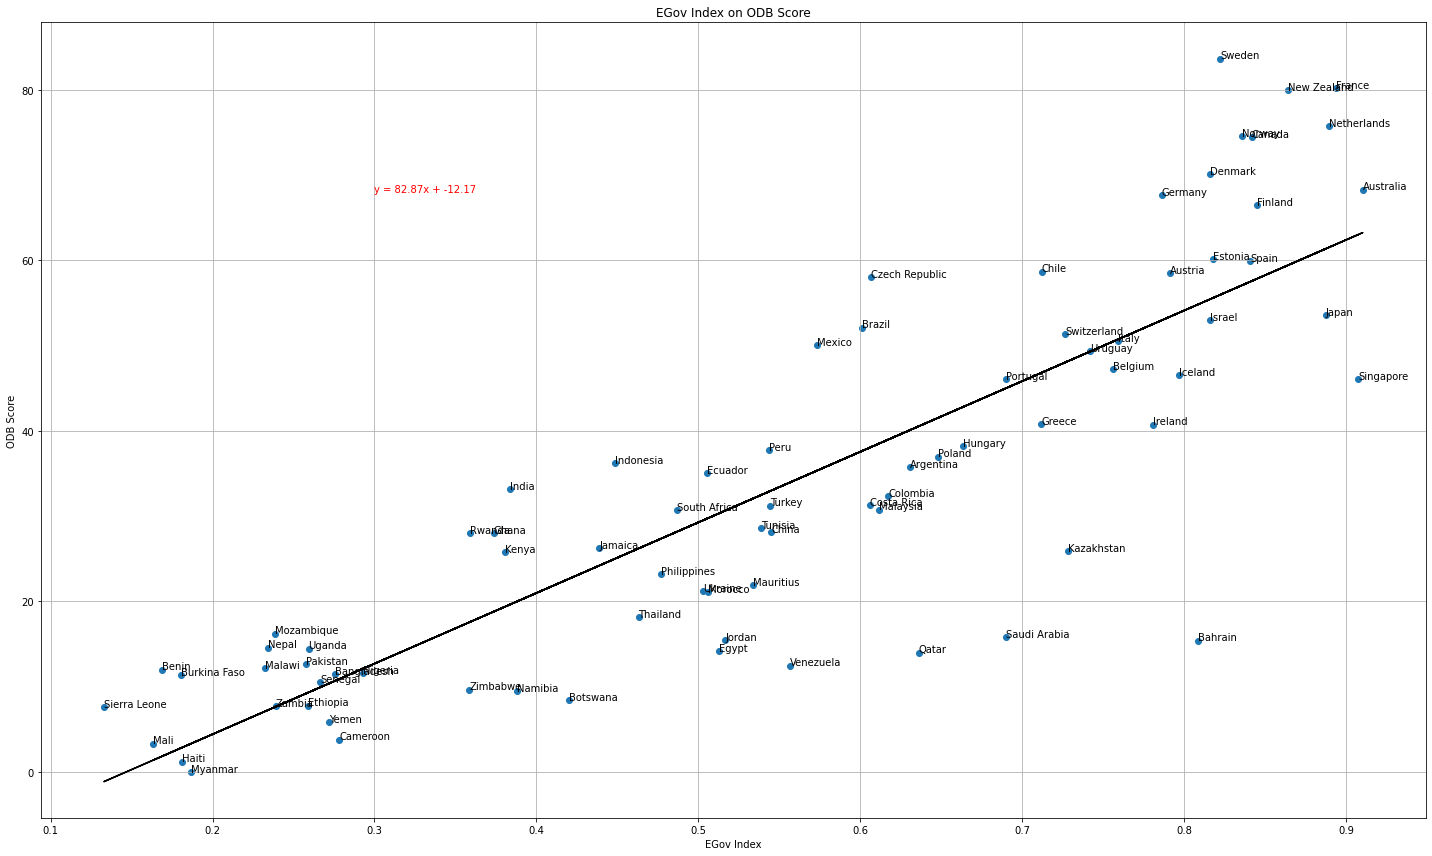

In [9]:
names = merged["Country"]

fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(x,y, label=names);
ax.plot(x, regress_line, color="black");
ax.annotate(line_eq,(0.3,68),fontsize=10,color="red");
ax.set(title="EGov Index on ODB Score",
      xlabel="EGov Index",
      ylabel="ODB Score");
for i, label in enumerate(names):
    ax.annotate(label, (x[i], y[i]));
ax.grid();
fig.tight_layout();

In [10]:
import statsmodels.api as sm
results = sm.OLS(y,sm.add_constant(x)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       ODB-Score-Scaled   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 19 May 2021   Prob (F-statistic):           8.73e-23
Time:                        18:40:09   Log-Likelihood:                -307.61
No. Observations:                  79   AIC:                             619.2
Df Residuals:                      77   BIC:                             623.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1742      3

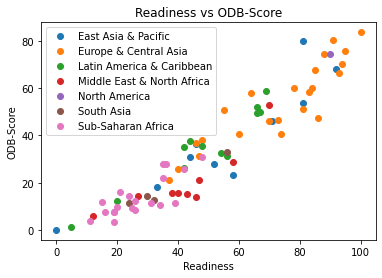

In [11]:
groups = merged.groupby("Region")
for name, group in groups:
    plt.plot(group["Readiness-Scaled"], group["ODB-Score-Scaled"], marker="o", linestyle="", label=name)
plt.title('Readiness vs ODB-Score')
plt.xlabel('Readiness')
plt.ylabel('ODB-Score')
plt.legend()

In [12]:
opendata16 = pd.read_csv("Resources/odb_2016.csv")
egov16 = pd.read_csv("Resources/EGOV_DATA_2016.csv")

In [13]:
opendata16["Country"] = opendata16["Country"].astype(str)
opendata16["Country"] = opendata16["Country"].str.strip()
egov16["Country Name"] = egov16["Country Name"].astype(str)
egov16["Country Name"] = egov16["Country Name"].str.strip()
merged16 = pd.merge(opendata16, egov16, left_on="Country", right_on="Country Name", how="inner")
merged16 = merged16.drop(columns=["Country Name","Survey Year","Unnamed: 0"])

In [14]:
merged16

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,Sub-Saharan Africa,MZ,MOZ,110,Mozambique,3.46,14,9,10,...,0,0,0,104,172,0.23050,0.20339,0.20290,0.38930,0.09929
98,2016,Sub-Saharan Africa,ML,MLI,111,Mali,2.46,12,8,10,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
99,2016,Sub-Saharan Africa,ZW,ZWE,111,Zimbabwe,1.87,9,7,10,...,0,0,0,115,134,0.34722,0.28814,0.26087,0.56412,0.21666
100,2016,East Asia & Pacific,MM,MMR,113,Myanmar,1.33,2,8,15,...,10,0,0,85,169,0.23619,0.10169,0.15942,0.48365,0.06551


In [15]:
x2 = merged16["E-Government Index"]
y2 = merged16["ODB-Score-Scaled"]

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)

regress_line2 = intercept2 + x2*slope2
line_eq = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

In [16]:
results = sm.OLS(y2,sm.add_constant(x2)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       ODB-Score-Scaled   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 19 May 2021   Prob (F-statistic):           2.04e-21
Time:                        18:40:09   Log-Likelihood:                -418.33
No. Observations:                 102   AIC:                             840.7
Df Residuals:                     100   BIC:                             845.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -18.1031      4

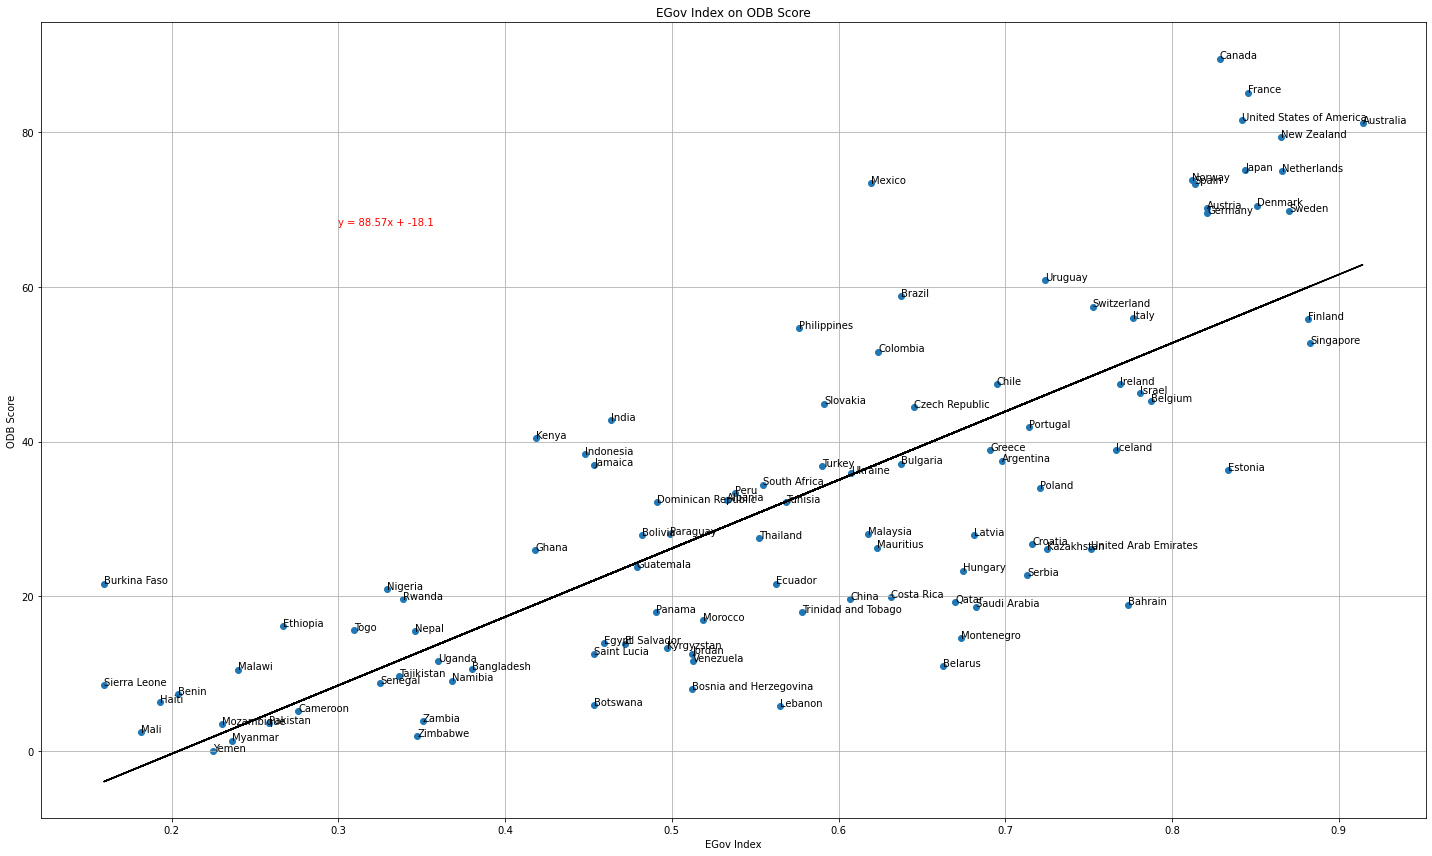

In [17]:
names2 = merged16["Country"]

fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(x2,y2, label=names2);
ax.plot(x2, regress_line2, color="black");
ax.annotate(line_eq,(0.3,68),fontsize=10,color="red");
ax.set(title="EGov Index on ODB Score",
      xlabel="EGov Index",
      ylabel="ODB Score");
for i, label in enumerate(names2):
    ax.annotate(label, (x2[i], y2[i]));
ax.grid();
fig.tight_layout();

In [18]:
def get_un_data(query_url):
    headers = dict(Accept="text/json")
    try:
        response = requests.get(query_url, headers=headers)
        decoded_data=codecs.decode(response.text.encode(), 'utf-8-sig')
        data = json.loads(decoded_data)
        return data
    except Exception as e:
        print(e)
        return None

## Joined Dataset

In [19]:
joined = pd.concat([merged,merged16])
joined = joined.drop(columns="Unnamed: 0")

In [20]:
joined = joined.drop(columns=["Cluster-Group","Survey Year"])

In [21]:
joined

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,81,...,85,91,53,4,14,0.82250,0.60784,0.70078,0.88020,0.88656
1,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,79,...,74,60,79,5,4,0.89384,0.96078,1.00000,0.88120,0.80029
2,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,83,...,69,0,67,14,9,0.86436,0.78431,0.84251,1.00000,0.75057
3,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,82,...,76,26,46,13,5,0.88966,1.00000,0.92913,0.92240,0.81751
4,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,83,...,100,17,48,8,13,0.83572,0.68627,0.75590,0.93800,0.81328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,Sub-Saharan Africa,MZ,MOZ,110,Mozambique,3.46,14,9,10,...,0,0,0,104,172,0.23050,0.20339,0.20290,0.38930,0.09929
98,2016,Sub-Saharan Africa,ML,MLI,111,Mali,2.46,12,8,10,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
99,2016,Sub-Saharan Africa,ZW,ZWE,111,Zimbabwe,1.87,9,7,10,...,0,0,0,115,134,0.34722,0.28814,0.26087,0.56412,0.21666
100,2016,East Asia & Pacific,MM,MMR,113,Myanmar,1.33,2,8,15,...,10,0,0,85,169,0.23619,0.10169,0.15942,0.48365,0.06551


In [22]:
joined.to_csv("Joined1416.csv")

In [23]:
joined_grp = joined.groupby(["Region","Year"])

In [24]:
avg = joined_grp.mean()
avg

ODB-Rank  ODB-Score-Scaled  \
Region                     Year                                
East Asia & Pacific        2014  38.100000         38.442000   
                           2016  39.300000         45.801000   
Europe & Central Asia      2014  22.217391         53.574348   
                           2016  40.911765         42.774118   
Latin America & Caribbean  2014  39.583333         35.192500   
                           2016  54.950000         31.678000   
Middle East & North Africa 2014  56.777778         20.358889   
                           2016  75.272727         19.143636   
North America              2014   7.000000         74.520000   
                           2016   3.000000         85.580000   
South Asia                 2014  58.750000         17.955000   
                           2016  79.250000         18.112500   
Sub-Saharan Africa         2014  67.150000         14.008500   
                           2016  85.809524         14.260952   

                                 Readiness-Scaled  \
Region                     Year                     
East Asia & Pacific        2014         55.800000   
                           2016         58.400000   
Europe & Central Asia      2014         72.695652   
                           2016         56.441176   
Latin America & Caribbean  2014         48.250000   
                           2016         44.100000   
Middle East & North Africa 2014         42.333333   
                           2016         34.454545   
North America              2014         90.000000   
                           2016         96.000000   
South Asia                 2014         35.500000   
                           2016         34.500000   
Sub-Saharan Africa         2014         27.050000   
                           2016         26.666667   

                                 Implementation-Innovation-Scaled  \
Region                     Year                                     
East Asia & Pacific        2014                         38.100000   
                           2016                         42.500000   
Europe & Central Asia      2014                         53.260870   
                           2016                         45.029412   
Latin America & Caribbean  2014                         38.833333   
                           2016                         36.250000   
Middle East & North Africa 2014                         16.555556   
                           2016                         21.363636   
North America              2014                         92.000000   
                           2016                         85.500000   
South Asia                 2014                         20.250000   
                           2016                         16.250000   
Sub-Saharan Africa         2014                         14.550000   
                           2016                         14.761905   

                                 Implementation-Social-Scaled  \
Region                     Year                                 
East Asia & Pacific        2014                     48.000000   
                           2016                     44.800000   
Europe & Central Asia      2014                     51.782609   
                           2016                     48.000000   
Latin America & Caribbean  2014                     49.833333   
                           2016                     35.550000   
Middle East & North Africa 2014                     23.777778   
                           2016                     24.909091   
North America              2014                     72.000000   
                           2016                     64.500000   
South Asia                 2014                     21.500000   
                           2016                     17.250000   
Sub-Saharan Africa         2014                     22.200000   
                           2016                     20.476190   

              

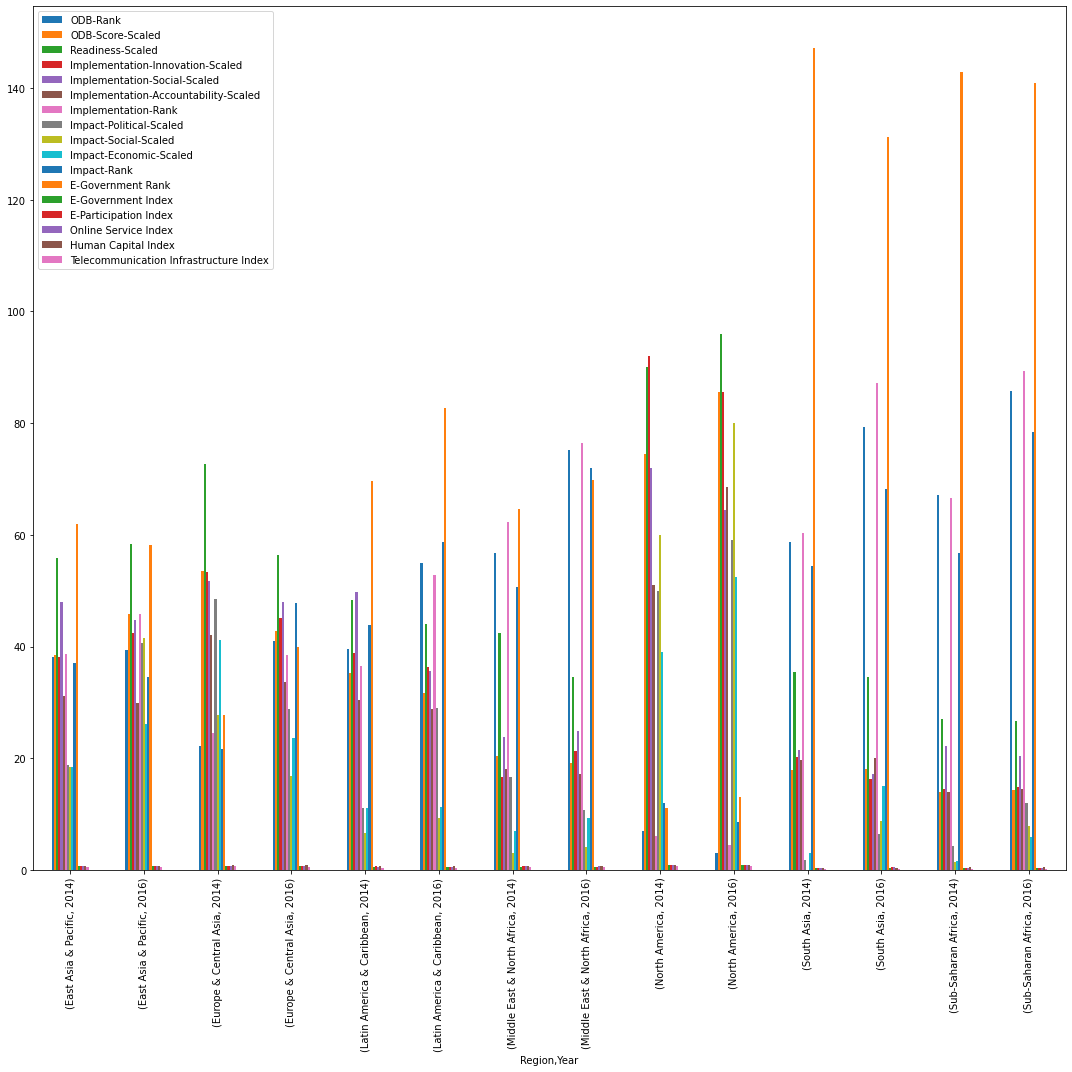

In [25]:
avg.plot(kind="bar", figsize=(15,15))
plt.tight_layout()

In [26]:
new = pd.DataFrame({
                   "ODB Score Mean":joined_grp["ODB-Score-Scaled"].mean()})

In [27]:
new = new.sort_values("Region", ascending=False)
new

ODB Score Mean
Region                     Year                
Sub-Saharan Africa         2014       14.008500
                           2016       14.260952
South Asia                 2014       17.955000
                           2016       18.112500
North America              2014       74.520000
                           2016       85.580000
Middle East & North Africa 2014       20.358889
                           2016       19.143636
Latin America & Caribbean  2014       35.192500
                           2016       31.678000
Europe & Central Asia      2014       53.574348
                           2016       42.774118
East Asia & Pacific        2014       38.442000
                           2016       45.801000

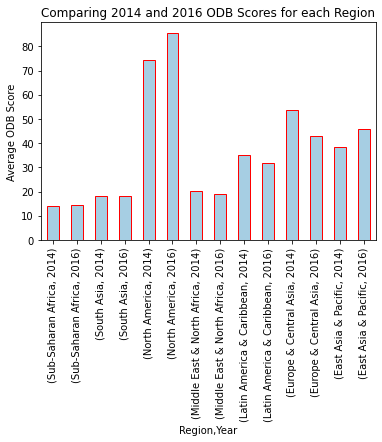

In [28]:
colors = plt.cm.Paired(np.arange(len(new)))
new.plot(kind="bar", title="Comparing 2014 and 2016 ODB Scores for each Region", legend=False,
         ylabel="Average ODB Score", color=colors, edgecolor="red");

In [29]:
scores=[]
for rows in new:
    scores.append(new["ODB Score Mean"])
    
scores

[Region                      Year
 Sub-Saharan Africa          2014    14.008500
                             2016    14.260952
 South Asia                  2014    17.955000
                             2016    18.112500
 North America               2014    74.520000
                             2016    85.580000
 Middle East & North Africa  2014    20.358889
                             2016    19.143636
 Latin America & Caribbean   2014    35.192500
                             2016    31.678000
 Europe & Central Asia       2014    53.574348
                             2016    42.774118
 East Asia & Pacific         2014    38.442000
                             2016    45.801000
 Name: ODB Score Mean, dtype: float64]

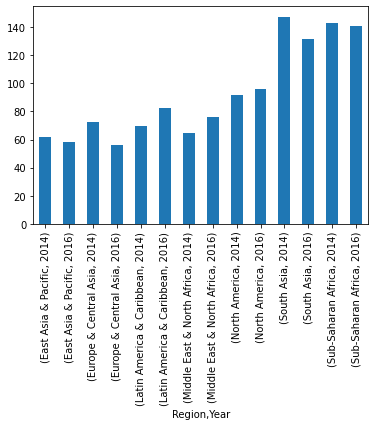

In [30]:
for columns in avg:
    avg[columns].plot(kind="bar")

In [31]:
clean_data = joined[["Year","Region","Country","Implementation-Social-Scaled",
                     "E-Participation Index","Online Service Index","Human Capital Index"]]

In [32]:
clean_data

,Year,Region,Country,Implementation-Social-Scaled,E-Participation Index,Online Service Index,Human Capital Index
0,2014,Europe & Central Asia,Sweden,81,0.60784,0.70078,0.88020
1,2014,Europe & Central Asia,France,79,0.96078,1.00000,0.88120
2,2014,East Asia & Pacific,New Zealand,83,0.78431,0.84251,1.00000
3,2014,Europe & Central Asia,Netherlands,82,1.00000,0.92913,0.92240
4,2014,Europe & Central Asia,Norway,83,0.68627,0.75590,0.93800
...,...,...,...,...,...,...,...
97,2016,Sub-Saharan Africa,Mozambique,10,0.20339,0.20290,0.38930
98,2016,Sub-Saharan Africa,Mali,10,0.06780,0.09420,0.23583
99,2016,Sub-Saharan Africa,Zimbabwe,10,0.28814,0.26087,0.56412
100,2016,East Asia & Pacific,Myanmar,15,0.10169,0.15942,0.48365


# Question: Does enhancing HPI improve on E-Participation of 'OpenData'?

We see an increase in an expected E-Participation Index in 2016 than 2014. Better access to education and provision of technological resources improves the chances of each country to score higher on E-Participation.

In [33]:
hci_2014 = clean_data.loc[clean_data["Year"]==2014]["Human Capital Index"]
epi_2014 = clean_data.loc[clean_data["Year"]==2014]["E-Participation Index"]
hci_2016 = clean_data.loc[clean_data["Year"]==2016]["Human Capital Index"]
epi_2016 = clean_data.loc[clean_data["Year"]==2016]["E-Participation Index"]

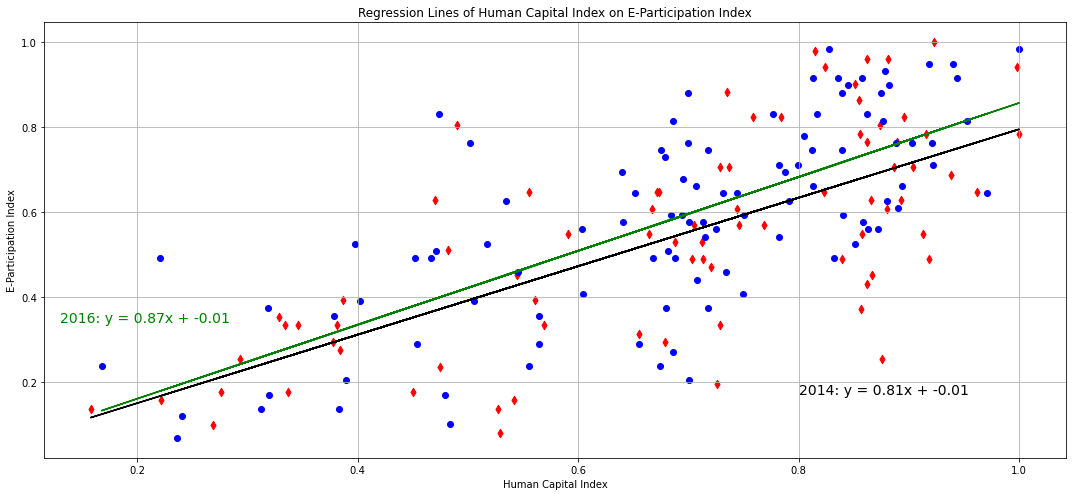

In [34]:
x1 = hci_2014
y1 = epi_2014
x2 = hci_2016
y2 = epi_2016

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
regress_line1 = intercept1 + x1*slope1
line_eq1 = "2014: y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
regress_line2 = intercept2 + x2*slope2
line_eq2 = "2016: y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))


fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(x1, y1, marker="d", color="red");
ax.plot(x1, regress_line1, color="black");
ax.annotate(line_eq1,(0.8,0.17),fontsize=14,color="black");

ax.scatter(x2, y2, marker="o", color="blue");
ax.plot(x2, regress_line2, color="green");
ax.annotate(line_eq2,(0.13,0.34),fontsize=14,color="green");

ax.set(title="Regression Lines of Human Capital Index on E-Participation Index",
      xlabel="Human Capital Index",
      ylabel="E-Participation Index")
ax.grid();
fig.tight_layout();

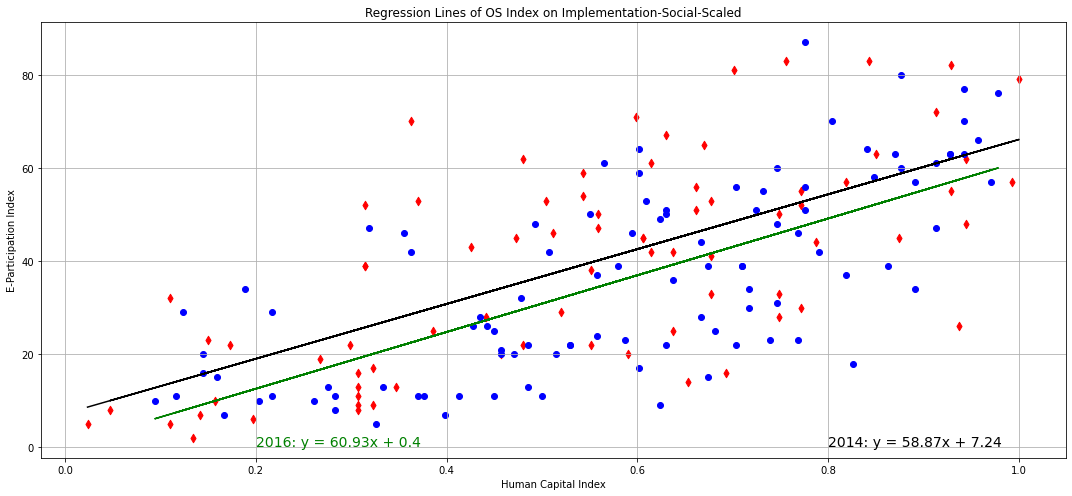

In [35]:
x1 = clean_data.loc[clean_data["Year"]==2014]["Online Service Index"]
y1 = clean_data.loc[clean_data["Year"]==2014]["Implementation-Social-Scaled"]
x2 = clean_data.loc[clean_data["Year"]==2016]["Online Service Index"]
y2 = clean_data.loc[clean_data["Year"]==2016]["Implementation-Social-Scaled"]

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
regress_line1 = intercept1 + x1*slope1
line_eq1 = "2014: y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2,y2)
regress_line2 = intercept2 + x2*slope2
line_eq2 = "2016: y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))


fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(x1, y1, marker="d", color="red");
ax.plot(x1, regress_line1, color="black");
ax.annotate(line_eq1,(0.8,0.17),fontsize=14,color="black");

ax.scatter(x2, y2, marker="o", color="blue");
ax.plot(x2, regress_line2, color="green");
ax.annotate(line_eq2,(0.2,0.34),fontsize=14,color="green");

ax.set(title="Regression Lines of OS Index on Implementation-Social-Scaled",
      xlabel="Human Capital Index",
      ylabel="E-Participation Index")
ax.grid();
fig.tight_layout();

In [36]:
bp = clean_data.groupby(["Region","Year"][1]).agg('describe')

In [37]:
bp2 = clean_data.groupby(["Region","Year"])

In [38]:
bp2.head()

,Year,Region,Country,Implementation-Social-Scaled,E-Participation Index,Online Service Index,Human Capital Index
0,2014,Europe & Central Asia,Sweden,81,0.60784,0.70078,0.88020
1,2014,Europe & Central Asia,France,79,0.96078,1.00000,0.88120
2,2014,East Asia & Pacific,New Zealand,83,0.78431,0.84251,1.00000
3,2014,Europe & Central Asia,Netherlands,82,1.00000,0.92913,0.92240
4,2014,Europe & Central Asia,Norway,83,0.68627,0.75590,0.93800
...,...,...,...,...,...,...,...
65,2016,Middle East & North Africa,Bahrain,18,0.74576,0.82609,0.71777
66,2016,Middle East & North Africa,Qatar,39,0.64407,0.67391,0.73166
74,2016,South Asia,Nepal,7,0.50847,0.39855,0.47142
82,2016,South Asia,Bangladesh,9,0.52542,0.62319,0.39731


In [39]:
x1 = hci_2014
y1 = epi_2014
x2 = hci_2016
y2 = epi_2016

results1 = sm.OLS(y1,sm.add_constant(x1)).fit()

print(results1.summary())

results2 = sm.OLS(y2,sm.add_constant(x2)).fit()

print(results2.summary())

                              OLS Regression Results                             
Dep. Variable:     E-Participation Index   R-squared:                       0.490
Model:                               OLS   Adj. R-squared:                  0.483
Method:                    Least Squares   F-statistic:                     73.84
Date:                   Wed, 19 May 2021   Prob (F-statistic):           7.30e-13
Time:                           18:40:14   Log-Likelihood:                 25.714
No. Observations:                     79   AIC:                            -47.43
Df Residuals:                         77   BIC:                            -42.69
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

In [40]:
x1 = clean_data.loc[clean_data["Year"]==2014]["Online Service Index"]
y1 = clean_data.loc[clean_data["Year"]==2014]["Implementation-Social-Scaled"]
x2 = clean_data.loc[clean_data["Year"]==2016]["Online Service Index"]
y2 = clean_data.loc[clean_data["Year"]==2016]["Implementation-Social-Scaled"]

results1 = sm.OLS(y1,sm.add_constant(x1)).fit()

print(results1.summary())

results2 = sm.OLS(y2,sm.add_constant(x2)).fit()

print(results2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Implementation-Social-Scaled   R-squared:                       0.450
Model:                                      OLS   Adj. R-squared:                  0.442
Method:                           Least Squares   F-statistic:                     62.89
Date:                          Wed, 19 May 2021   Prob (F-statistic):           1.38e-11
Time:                                  18:40:14   Log-Likelihood:                -332.28
No. Observations:                            79   AIC:                             668.6
Df Residuals:                                77   BIC:                             673.3
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [41]:
locations = clean_data.loc[clean_data["Year"]==2014]["Country"]
weight = clean_data.loc[clean_data["Year"]==2014]["Implementation-Social-Scaled"].astype(float)

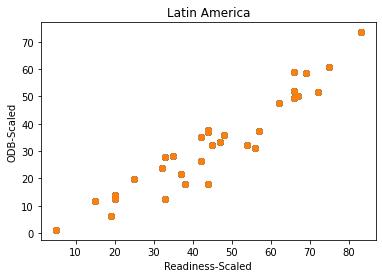

In [42]:
latinamerica = joined.loc[(joined['Region'] == "Latin America & Caribbean")]
for group in latinamerica:
    plt.plot(latinamerica["Readiness-Scaled"], latinamerica['ODB-Score-Scaled'], marker="o", linestyle="");
    plt.title('Latin America')
    plt.xlabel('Readiness-Scaled')
    plt.ylabel('ODB-Scaled')

In [43]:
joined

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,81,...,85,91,53,4,14,0.82250,0.60784,0.70078,0.88020,0.88656
1,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,79,...,74,60,79,5,4,0.89384,0.96078,1.00000,0.88120,0.80029
2,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,83,...,69,0,67,14,9,0.86436,0.78431,0.84251,1.00000,0.75057
3,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,82,...,76,26,46,13,5,0.88966,1.00000,0.92913,0.92240,0.81751
4,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,83,...,100,17,48,8,13,0.83572,0.68627,0.75590,0.93800,0.81328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,Sub-Saharan Africa,MZ,MOZ,110,Mozambique,3.46,14,9,10,...,0,0,0,104,172,0.23050,0.20339,0.20290,0.38930,0.09929
98,2016,Sub-Saharan Africa,ML,MLI,111,Mali,2.46,12,8,10,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
99,2016,Sub-Saharan Africa,ZW,ZWE,111,Zimbabwe,1.87,9,7,10,...,0,0,0,115,134,0.34722,0.28814,0.26087,0.56412,0.21666
100,2016,East Asia & Pacific,MM,MMR,113,Myanmar,1.33,2,8,15,...,10,0,0,85,169,0.23619,0.10169,0.15942,0.48365,0.06551


In [44]:
scores14 = joined.loc[joined["Year"]==2014]["ODB-Score-Scaled"].astype(int)
scores16 = joined.loc[joined["Year"]==2016]["ODB-Score-Scaled"].astype(int)
country14 = joined.loc[joined["Year"]==2014]["Country"]
country16 = joined.loc[joined["Year"]==2016]["Country"]

indx1 = np.arange(len(country16))
indx2 = np.arange(len(country14))

In [45]:
def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

In [46]:
scores14

0     83
1     80
2     80
3     75
4     74
      ..
74     5
75     3
76     3
77     1
78     0
Name: ODB-Score-Scaled, Length: 79, dtype: int32

In [47]:
# fig,ax=plt.subplots(figsize=(20,10))
# ax.bar(country16, scores16, label="2016 Scores");
# ax.bar(country14, scores14, label="2014 Scores", alpha=0.6);
# plt.xticks(rotation=90);
# ax.legend();
# ax.set(title="2014 ODB Scores vs 2016 ODB Scores",
#       xlabel="Country",
#       ylabel="ODB Scores Scaled")
# fig.tight_layout();

# for i in indx1:
#     plt.text(i, scores16[i], scores16[i],
#     ha='center',
#     va='bottom');

# fig.savefig("test.png")

In [48]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (joined["Country"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [129]:
joined["Longitude"] = longitude
joined["Latitude"] = latitude

In [130]:
joined

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index,Longitude,Latitude
0,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,81,...,53,4,14,0.82250,0.60784,0.70078,0.88020,0.88656,14.520858,59.674971
1,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,79,...,79,5,4,0.89384,0.96078,1.00000,0.88120,0.80029,1.888334,46.603354
2,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,83,...,67,14,9,0.86436,0.78431,0.84251,1.00000,0.75057,172.834408,-41.500083
3,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,82,...,46,13,5,0.88966,1.00000,0.92913,0.92240,0.81751,5.748082,52.500170
4,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,83,...,48,8,13,0.83572,0.68627,0.75590,0.93800,0.81328,9.099972,60.500021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,Sub-Saharan Africa,MZ,MOZ,110,Mozambique,3.46,14,9,10,...,0,104,172,0.23050,0.20339,0.20290,0.38930,0.09929,34.914498,-19.302233
98,2016,Sub-Saharan Africa,ML,MLI,111,Mali,2.46,12,8,10,...,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492,-2.290024,16.370036
99,2016,Sub-Saharan Africa,ZW,ZWE,111,Zimbabwe,1.87,9,7,10,...,0,115,134,0.34722,0.28814,0.26087,0.56412,0.21666,29.353650,-19.016880
100,2016,East Asia & Pacific,MM,MMR,113,Myanmar,1.33,2,8,15,...,0,85,169,0.23619,0.10169,0.15942,0.48365,0.06551,95.999965,17.175050


In [140]:
tt16

0      89.54
1      85.13
2      81.62
3      81.15
4      79.38
       ...  
97      3.46
98      2.46
99      1.87
100     1.33
101     0.00
Name: ODB-Score-Scaled, Length: 102, dtype: float64

In [137]:
country = joined.loc[joined["Year"]==2014]["Country"]
# lng = joined.loc[joined["Year"]==2016]["Longitude"]
# lat = joined.loc[joined["Year"]==2016]["Latitude"]
tt14 = joined.loc[joined["Year"]==2014]["ODB-Score-Scaled"]
tt16 = joined.loc[joined["Year"]==2016]["ODB-Score-Scaled"]
reg = joined.loc[joined["Year"]==2014]["Region"]

testdata = pd.DataFrame({"Countries": country,
#                         "lat":lat,
#                         "lng":lng,
                        "ODB 14": tt14,
                        "ODB 16": tt16,
                        "Region": reg})

testdata.dropna()

,Countries,ODB 14,ODB 16,Region
0,Sweden,83.70,89.54,Europe & Central Asia
1,France,80.21,85.13,Europe & Central Asia
2,New Zealand,80.01,81.62,East Asia & Pacific
3,Netherlands,75.79,81.15,Europe & Central Asia
4,Norway,74.59,79.38,Europe & Central Asia
...,...,...,...,...
74,Yemen,5.80,15.49,Middle East & North Africa
75,Cameroon,3.77,13.89,Sub-Saharan Africa
76,Mali,3.30,13.88,Sub-Saharan Africa
77,Haiti,1.19,12.58,Latin America & Caribbean


In [138]:
testdata["Percentage Change"] = (testdata["ODB 16"]-testdata["ODB 14"])/testdata["ODB 14"]*100
meantest = testdata.groupby(["Region"])

In [139]:
meantest["Percentage Change"].mean()

Region
East Asia & Pacific                 inf
Europe & Central Asia         10.671045
Latin America & Caribbean     95.293044
Middle East & North Africa    60.502236
North America                  0.858830
South Asia                    53.621094
Sub-Saharan Africa            86.250621
Name: Percentage Change, dtype: float64

In [127]:
means = pd.DataFrame({
                     "Percentage Change": meantest["Percentage Change"].mean()})
means.reset_index()
means.sort_values("Percentage Change", ascending=False)

,Percentage Change
Region,
Europe & Central Asia,inf
Middle East & North Africa,180.445706
South Asia,89.467572
Sub-Saharan Africa,63.497367
Latin America & Caribbean,49.051767
East Asia & Pacific,18.210054
North America,4.494774


In [120]:
means

,Percentage Change
Region,
East Asia & Pacific,18.210054
Europe & Central Asia,inf
Latin America & Caribbean,49.051767
Middle East & North Africa,180.445706
North America,4.494774
South Asia,89.467572
Sub-Saharan Africa,63.497367


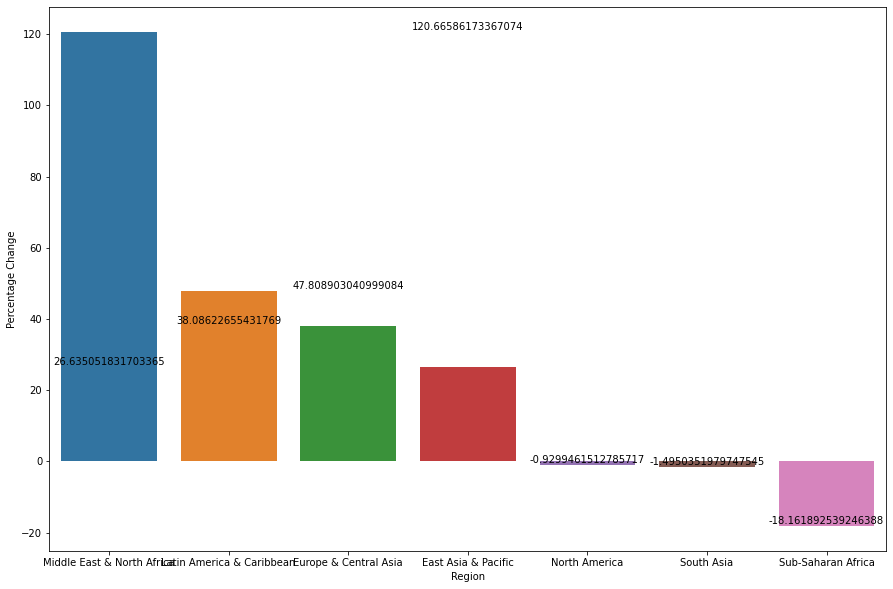

In [96]:
fig, ax = plt.subplots(figsize=(15,10))


In [58]:
eastasia = testdata.loc[testdata["Region"]=="Europe & Central Asia"]

In [53]:
locations2 = eastasia[["lat", "lng"]]
# locations

egov = eastasia["Egov 16"].astype(float)

fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations2, weights=egov,
                                   dissipating=False, max_intensity=10,
                                   point_radius=1)

fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# Setting the path to the shapefile
SHAPEFILE = 'data/shapefiles/worldmap/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

NameError: name 'gpd' is not defined

In [55]:
countries_string = requests.get("https://raw.githubusercontent.com/johan/world.geo.json/master/").content
countries = json.loads(countries_string)

JSONDecodeError: Extra data: line 1 column 4 (char 3)